## 지도학습 기법1: SVM

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print('버전: ', mpl.__version__)
print('설치 위치: ', mpl.__file__)
print('설정 위치: ', mpl.get_configdir())
print('캐시 위치: ', mpl.get_cachedir())

print('설정 파일 위치: ', mpl.matplotlib_fname())

버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Affinity\.matplotlib
캐시 위치:  C:\Users\Affinity\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [8]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# ttf 폰트 전체개수
print(len(font_list))

958


In [10]:
font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명만 출력
f[20:30]

958


['STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono']

In [11]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

In [14]:
path = 'C:/Windows/Fonts/H2GTRM.ttf'
fontprop=fm.FontProperties(fname=path,size=10)

[[ -1.72161036  -1.48033142]
 [ -3.6573384   -9.5482383 ]
 [  7.0778163    0.99508772]
 [ -1.36579859  -0.3148625 ]
 [ -2.66521206  -3.12591651]
 [  7.63027116   8.69797933]
 [ -5.27144331 -12.11880698]
 [  7.91767139   1.41547387]
 [ -1.41284184   0.11296348]
 [ -1.01519039  -1.03318203]
 [  8.2634157   10.34723435]
 [  6.96767867   8.9622523 ]
 [ -0.84779249  -2.12185612]
 [  7.48006237   2.49392925]
 [  7.71454967   1.8420701 ]
 [ -7.74064658  -8.61800744]
 [ -5.41087235  -8.7194128 ]
 [ -2.27579204  -2.89699926]
 [ -1.25668449  -2.33416219]
 [  7.61227907   9.4463627 ]
 [  8.81545663   8.76386046]
 [  7.1895354    0.43090048]
 [  7.40292703   9.16217702]
 [  5.17209648  11.78064756]
 [ -2.10476115  -1.57846672]
 [  6.5342397    9.45532341]
 [  7.59635095   8.0197955 ]
 [ -0.6560501    0.68997013]
 [ -4.86090778 -10.77386053]
 [  8.90864428   0.97764968]
 [  8.09770696  -0.58369965]
 [ -0.79757091  -2.88641638]
 [  9.92897802   1.76719511]
 [ -1.36106796  -2.02701586]
 [  5.5987887 

Text(0, 0.5, '특성 1')

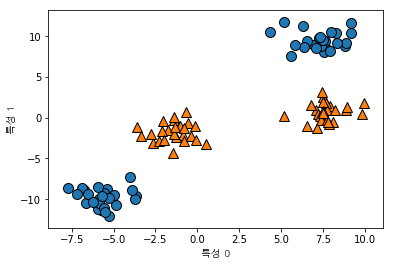

In [26]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=4, random_state=8)
y=y %2
print(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0", fontproperties=fontprop)
plt.ylabel("특성 1", fontproperties=fontprop)

### 직선으로 데이터포인트 나누는 것

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

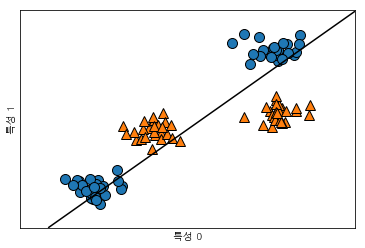

In [22]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0",fontproperties=fontprop)
plt.ylabel('특성 1',fontproperties=fontprop)


### 두 번째 특성을 제곱하여 추가합니다

Text(0.5, 0, '특성1**2')

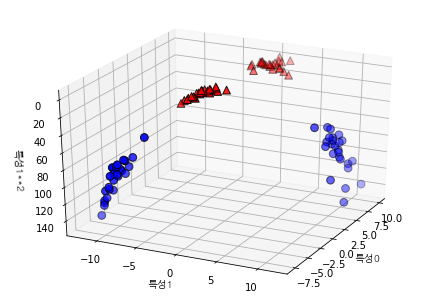

In [23]:
X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
#y == 0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그립니다
mask=y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0',fontproperties=fontprop)
ax.set_ylabel('특성1',fontproperties=fontprop)
ax.set_zlabel('특성1**2',fontproperties=fontprop)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1**2')

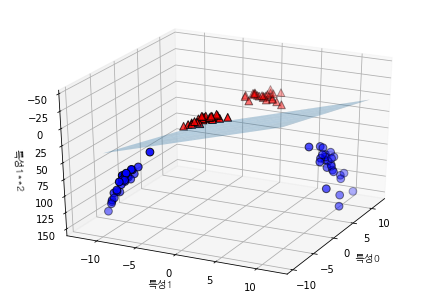

In [24]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#선형 결정 결계 그리기
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max() +2, 50)
yy=np.linspace(X_new[:,0].min()-2, X_new[:,0].max() +2, 50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0",fontproperties=fontprop)
ax.set_ylabel("특성1",fontproperties=fontprop)
ax.set_zlabel("특성1**2",fontproperties=fontprop)

### SVM 아이디어 살펴보기

### 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님 (직선보다 타원에 가까운 모습)

Text(0, 0.5, '특성 1')

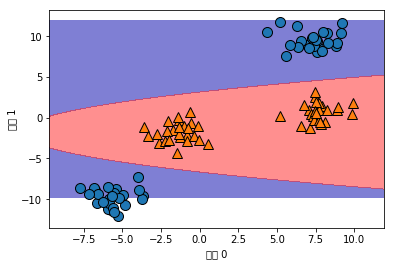

In [25]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### (위에서 쳐다봤을 때)

In [ ]:
 #참고: LIBSVM, https://www.csie.ntu.edu.tw/~cjlin/libsvm/

### SVM 이해하기

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


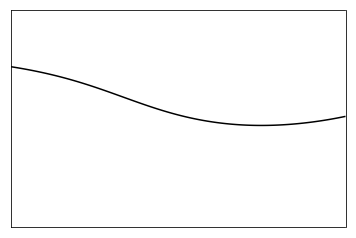

In [32]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
print(X,y)
svm=SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

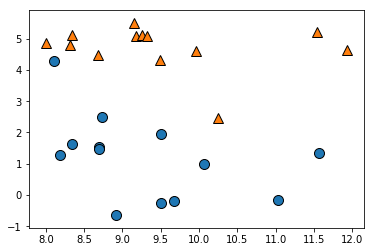

In [33]:
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [38]:
# 서포트 벡터
sv=svm.support_vectors_
print(sv)

[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


[False False False  True  True]


Text(0, 0.5, '특성 1')

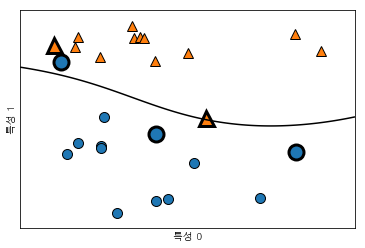

In [39]:
#dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv_labels=svm.dual_coef_.ravel()>0
print(sv_labels)
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0",fontproperties=fontprop)
plt.ylabel("특성 1",fontproperties=fontprop)

### 매개변수 튜닝

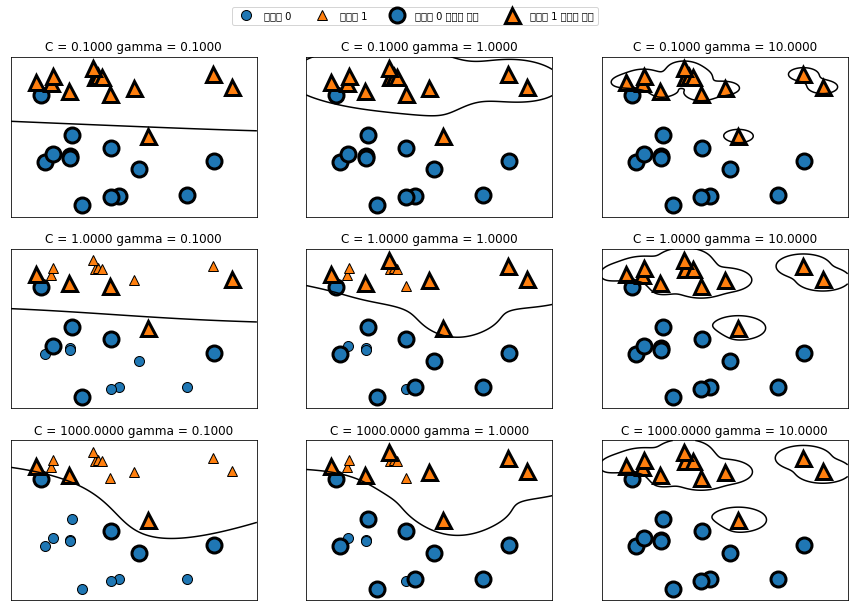

In [42]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터 ", "클래스 1 서포트 벡터"], ncol=4, loc=(.9,1.2))

### SVM 이해하기 - 암 데이터 / C=1, gamma=1/n_features

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}". format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}" .format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 데이터 플롯 해보기 -> 각 특성의 최솟값과 최댓값을 로그 스케일로 나타내기

Text(0, 0.5, '특성 크기')

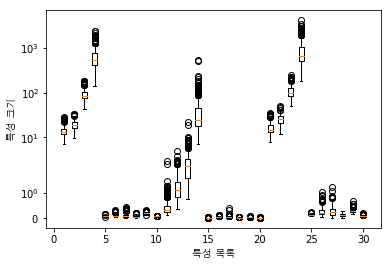

In [47]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록",fontproperties=fontprop)
plt.ylabel("특성 크기",fontproperties=fontprop)

#### 플롯을 보니, 스케일 차이가 나도 너무 난다-> 전처리!!!

In [49]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에서 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 입니다. 
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))
 




특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [52]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}" .format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}" .format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Naive Bayes

In [63]:
from numpy import *
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'], 
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'], 
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'], 
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'], 
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'], 
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1] # 1 = abusive, 0 = not
    return postingList, classVec

def createVocabList(dataSet): 
    vocabSet = set([]) # create empty set
    for document in dataSet:
        vocabSet = vocabSet | set(document) # union of the two sets
    return list(vocabSet)

In [67]:
def setOfWords2Vec(vocabList, inputSet):
    returnVec=[0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]= 1
        else: print("the word: {} is not in my Vocabulary!" .format(word))
    return returnVec

In [56]:
listOPosts, listClasses = loadDataSet()

In [57]:
listOPosts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [59]:
myVocabList=createVocabList(listOPosts)

In [60]:
myVocabList

['mr',
 'cute',
 'buying',
 'is',
 'has',
 'dog',
 'flea',
 'so',
 'problems',
 'I',
 'posting',
 'ate',
 'my',
 'help',
 'licks',
 'steak',
 'worthless',
 'how',
 'garbage',
 'food',
 'quit',
 'maybe',
 'please',
 'park',
 'take',
 'to',
 'dalmation',
 'stupid',
 'him',
 'stop',
 'love',
 'not']

In [68]:
setOfWords2Vec(myVocabList, listOPosts[0])

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### 훈련: 단어 벡터로 확률 계산하기

In [75]:
def trainNBO(trainMatrix, trainCategory):
    numTrainDocs=len(trainMatrix)
    numWords=len(trainMatrix[0])
    pAbusive=sum(trainCategory)/float(numTrainDocs)
    p0Num=zeros(numWords); p1Num = zeros(numWords)
    p0Denom=0.0; p1Denom=0.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
            p1Denom+=sum(trainMatrix[i])
        else:
            p0Num+=trainMatrix[i]
            p0Denom+=sum(trainMatrix[i])
    p1Vect=(p1Num/p1Denom)
    p0Vect=(p0Num/p0Denom)
    return p0Vect, p1Vect, pAbusive

In [76]:
trainMat=[]
for postinDoc in listOPosts:
    trainMat.append(setOfWords2Vec(myVocabList,postinDoc))

In [77]:
p0V, p1V, pAb = trainNBO(trainMat, listClasses)

In [78]:
p0V

array([0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.        , 0.04166667, 0.125     , 0.04166667, 0.04166667,
       0.04166667, 0.        , 0.04166667, 0.        , 0.        ,
       0.        , 0.        , 0.04166667, 0.        , 0.        ,
       0.04166667, 0.04166667, 0.        , 0.08333333, 0.04166667,
       0.04166667, 0.        ])

In [79]:
p1V

array([0.        , 0.        , 0.05263158, 0.        , 0.        ,
       0.10526316, 0.        , 0.        , 0.        , 0.        ,
       0.05263158, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10526316, 0.        , 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.        , 0.05263158, 0.05263158,
       0.05263158, 0.        , 0.15789474, 0.05263158, 0.05263158,
       0.        , 0.05263158])

In [80]:
pAb

0.5

In [82]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1.0-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [84]:
def testingNB():
    list0Posts, listClasses = loadDataSet()
    testEntry=['love', 'my', 'dalmation', 'jinman']
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as: {}" .format(testEntry,classifyNB(thisDoc, p0V, p1V, pAb)))
    testEntry=['stupid', 'garbage']
    thisDoc=array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as :{}". format(testEntry, classifyNB(thisDoc, p0V, p1V, pAb)))

In [85]:
testingNB()

the word: jinman is not in my Vocabulary!
['love', 'my', 'dalmation', 'jinman'] classified as: 0
['stupid', 'garbage'] classified as :1


# Performance Evaluation

## ROC 그려보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

In [87]:
data_X, class_label=make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
odel=KNeighborsClassifier()
model.fit(trainX, trainy)

NameError: name 'make_classification' is not defined

## k-fold cross-validation

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
KNN=KNeighborsClassifier()
scores=cross_val_score(KNN, iris.data, iris.target)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [93]:
scores=cross_val_score(KNN,iris.data, iris.target, cv=5)

In [92]:
from sklearn.model_selection import cross_validate
res = cross_validate(KNN, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.00099802]),
 'score_time': array([0.00299168, 0.00199437, 0.0009973 , 0.00099754, 0.00099802]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [94]:
from sklearn.datasets import load_iris
iris=load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### LOOCV

In [95]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(KNN, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


### Shuffle-split cross-validation

In [96]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores=cross_val_score(KNN, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)


교차 검증 점수:
 [0.94666667 0.92       0.94666667 0.96       0.94666667 0.96
 0.96       0.97333333 0.94666667 0.90666667]


## Grid Search

In [98]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}" .format(X_train.shape[0], X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 svc를 평가합니다
        score=svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score>best_score:
            best_score=score
            best_parameters={"C":C, 'gamma':gamma}
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:", best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [99]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}" .format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다 
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 svc를 평가합니다
        score=svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score>best_score:
            best_score=score
            best_parameters={"C":C, 'gamma':gamma}
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:", best_parameters)

훈련 세트의 크기: 84 테스트 세트의 크기: 28
최고 점수: 0.96
최적 매개변수: {'C': 10, 'gamma': 0.001}


In [100]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}" .format(best_score))
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.96
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92


# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = pd.read_csv("LOG_DATA.csv")

In [5]:
titanic.head(3) # 데이터 확인

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,20181101000125600000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,20181101000143000000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,20181101000144700000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN


In [108]:
titanic.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [109]:
titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [110]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


In [111]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
missing_df=titanic.isnull().sum().reset_index()

In [113]:
missing_df.columns = ['column', 'count']

In [114]:
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]

In [116]:
missing_df.loc[missing_df['ratio'] !=0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


<function matplotlib.pyplot.show(*args, **kw)>

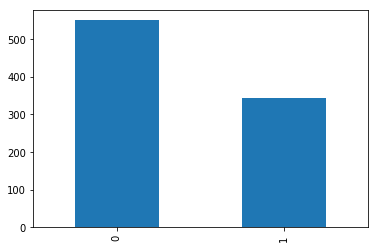

In [117]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.show

In [118]:
category_feature = [col for col in titanic.columns if
                   titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [119]:
category_feature = list(set(category_feature) - set(['Survived'])) # 필요없는것 뺌
category_feature

['Embarked', 'Pclass', 'Name', 'Ticket', 'Sex', 'Cabin']

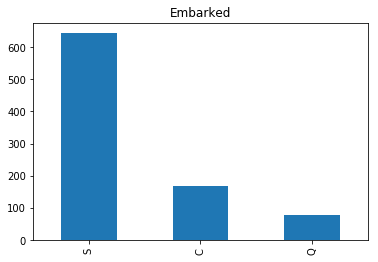

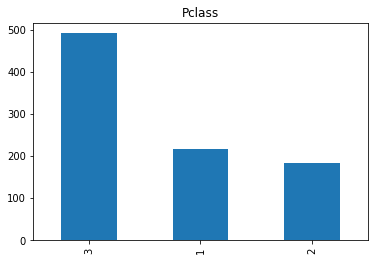

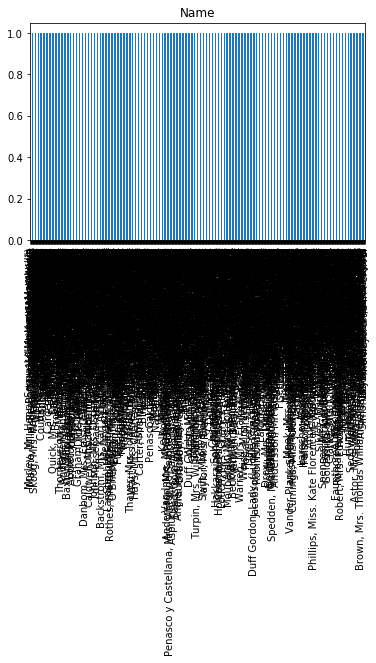

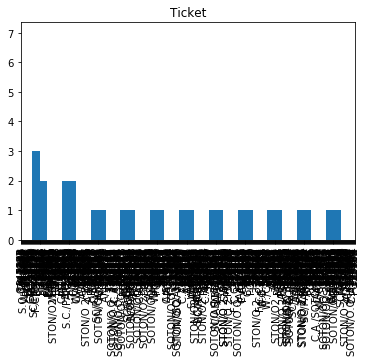

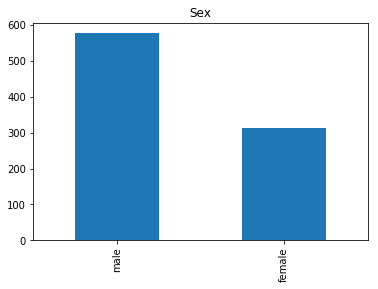

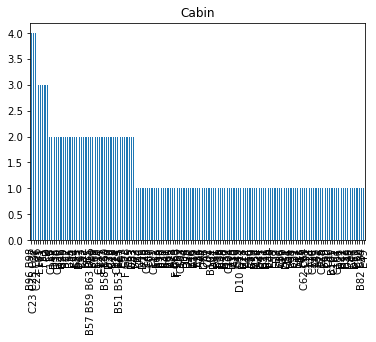

In [120]:
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

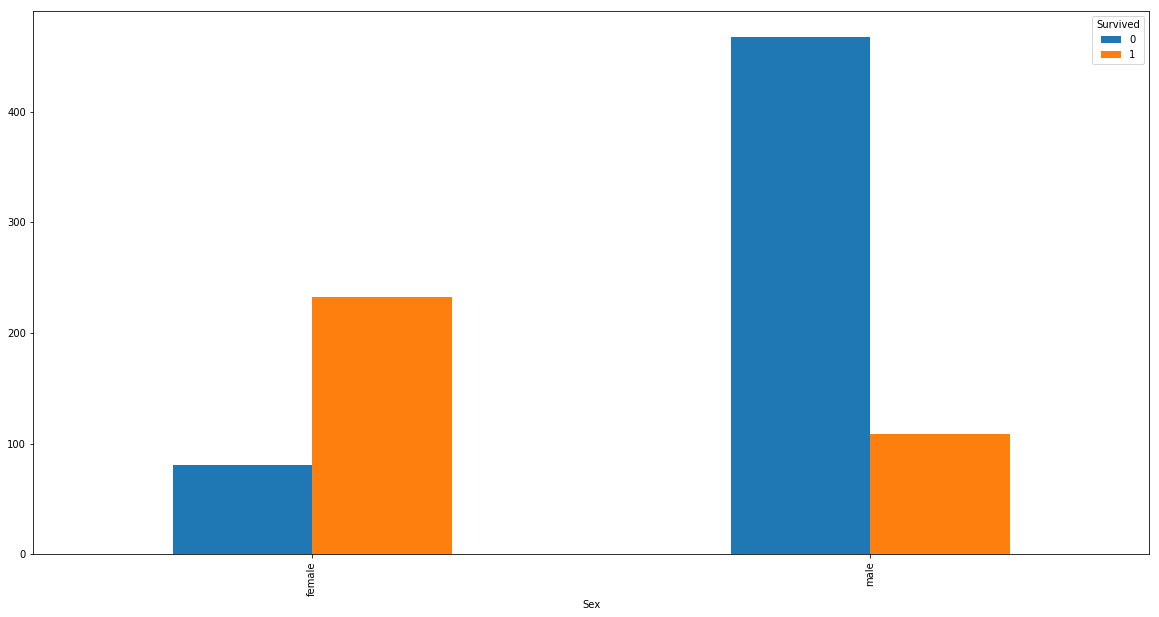

In [121]:
sex_df = titanic.groupby(['Sex', 'Survived'])['Survived'].count() \
.unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.show()

In [122]:
numerical_feature = list(set(titanic.columns) - set(category_feature) 
                         - set(['PassengerId', 'Survived']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

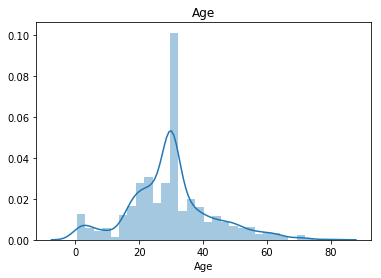

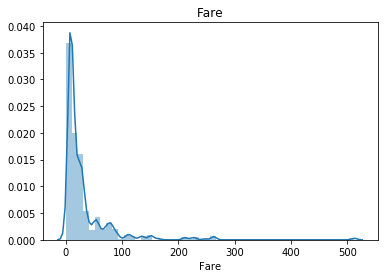

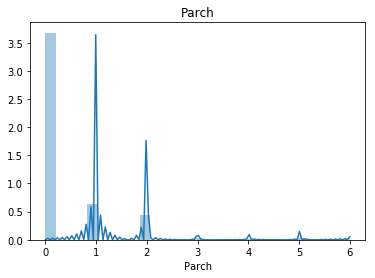

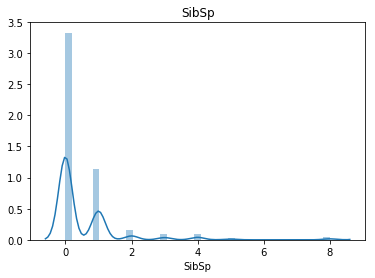

In [124]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

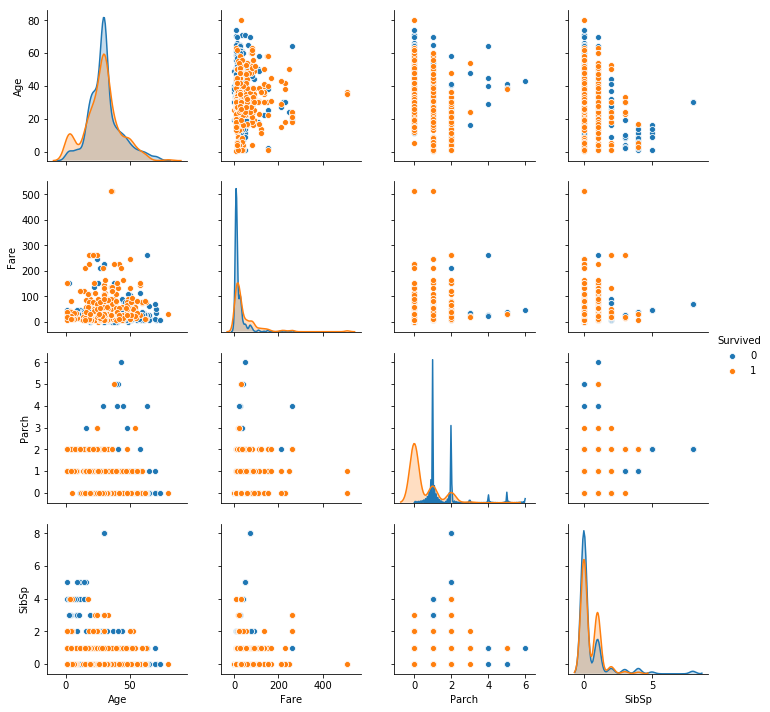

In [125]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived',
            x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

## 2. 자동차 보험 데이터

In [126]:
import pandas as pd
import numpy as np

In [127]:
# 훈련 데이터, 테스트 데이터를 읽어온다
trn = pd.read_csv('ssd_train.csv', na_values=['-1', '-1.0'])
tst = pd.read_csv('ssd_test.csv', na_values=['-1', '-1.0'])

In [128]:
# 데이터의 크기를 확인한다
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [129]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [130]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [131]:
# 변수의 최대값, 최소값 등을 확인한다
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
# 변수의 결측값을 확인한다
trn.isnull().sum(axis=0)
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [133]:
np.unique(trn['target'])

array([0, 1], dtype=int64)

In [134]:
1.0 * sum(trn['target'])/trn.shape[0]

0.036447517859182946

In [136]:
# 훈련 데ㅣ터와 테스트 데이터를 통합한다
tst['target'] =np.nan
df=pd.concat([trn,tst], axis=0)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:
# 시각화 관련 라이브러리를 불러온다
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [139]:
# 시각화 관련 함수를 미리 정의한다.
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
def dist_plot(col,data):
    f,ax = plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()
def bar_plot_ci(col,data):
    f,ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y='target', data=data)
    plt.show()

In [140]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
         'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 
         'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
         'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
         'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 
            'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 
           'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
           'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04,',
           'ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08',
            'ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13',
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 
         'ps_calc_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

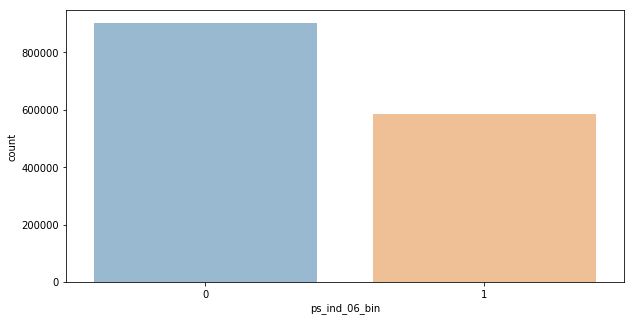

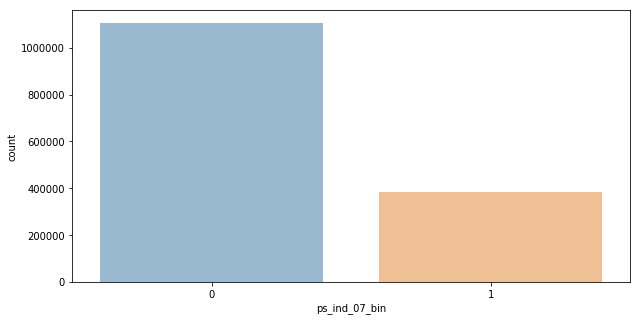

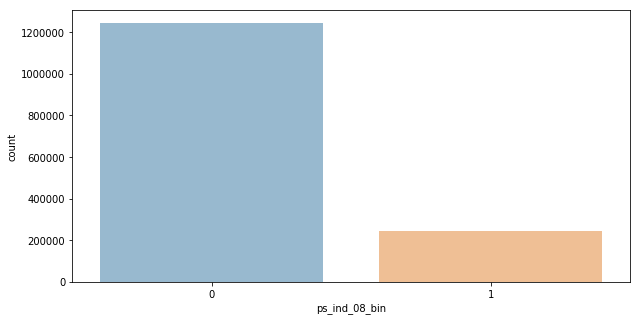

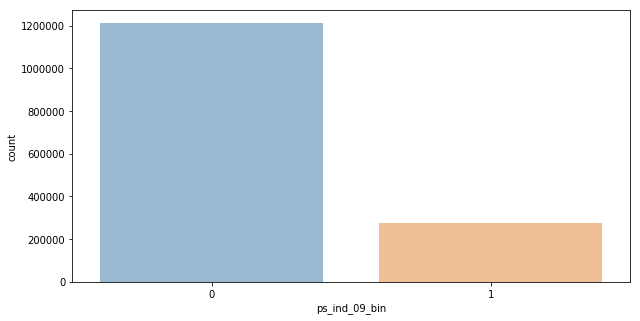

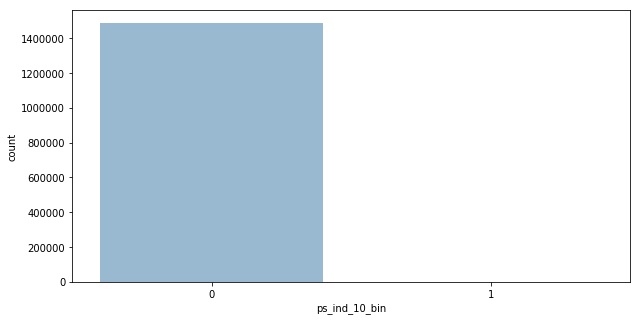

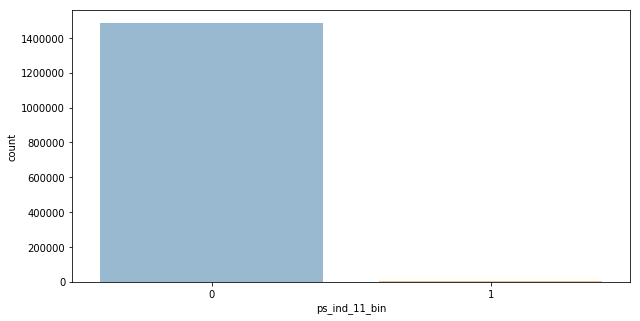

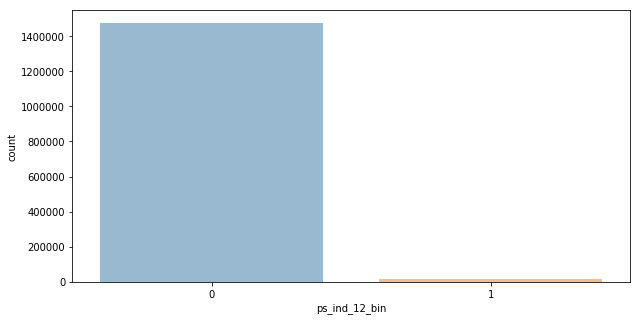

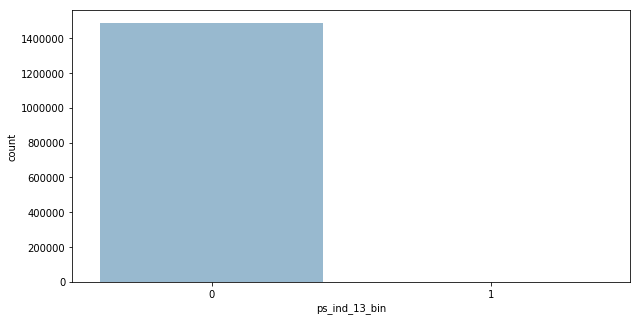

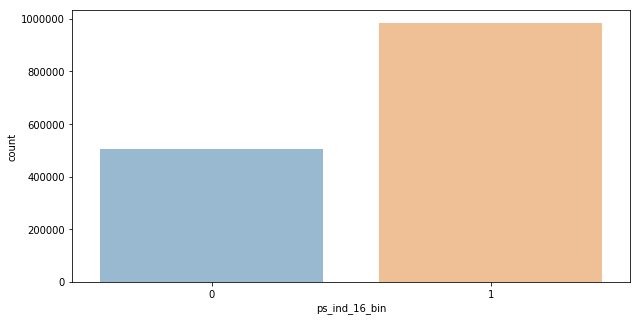

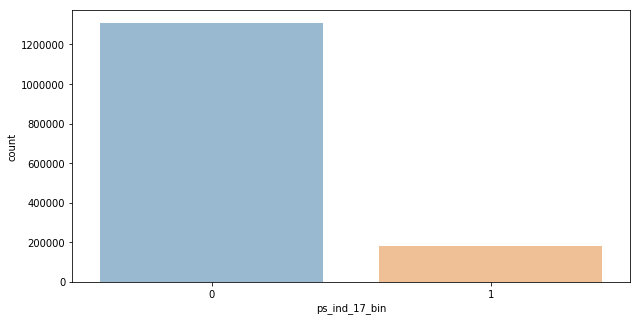

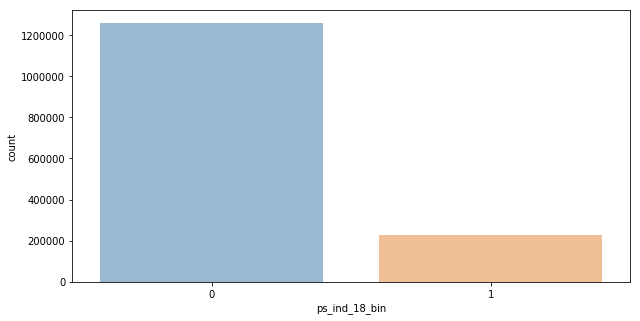

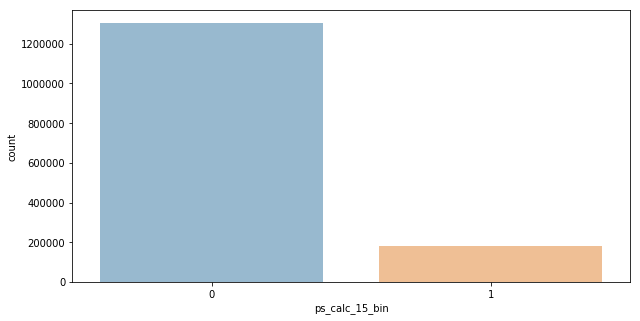

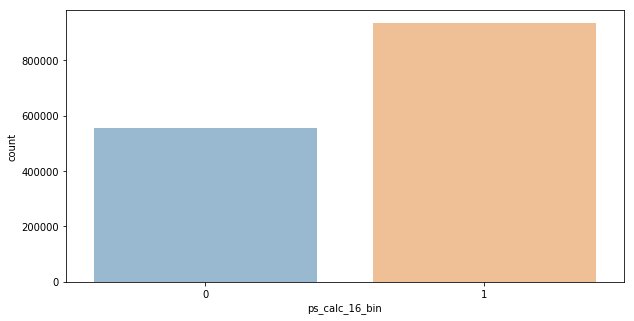

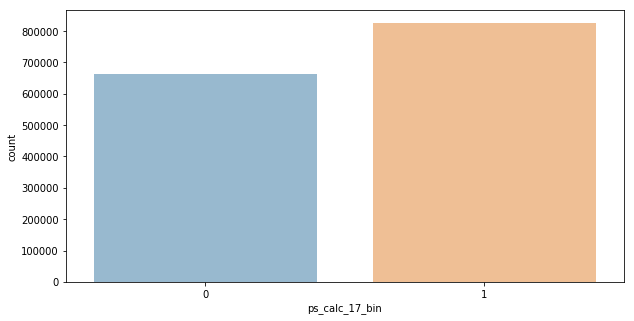

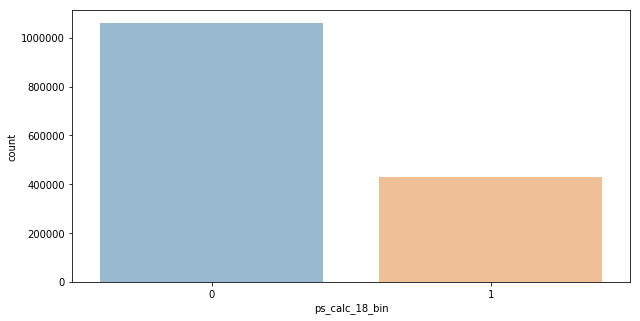

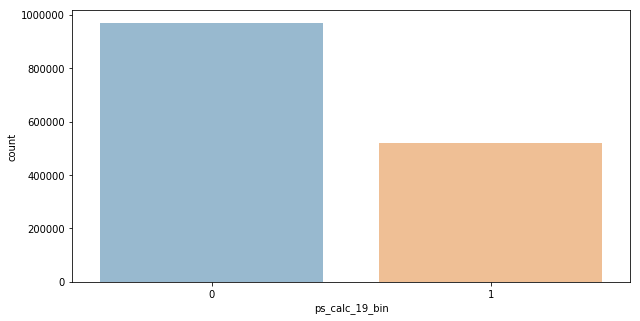

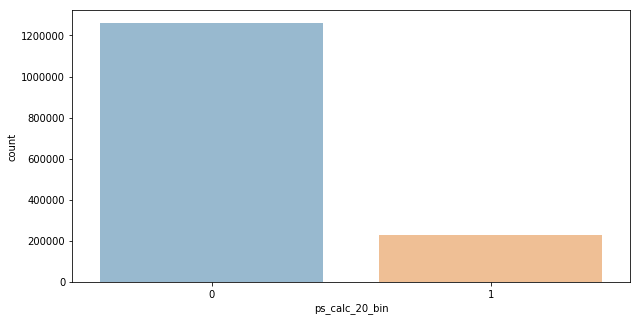

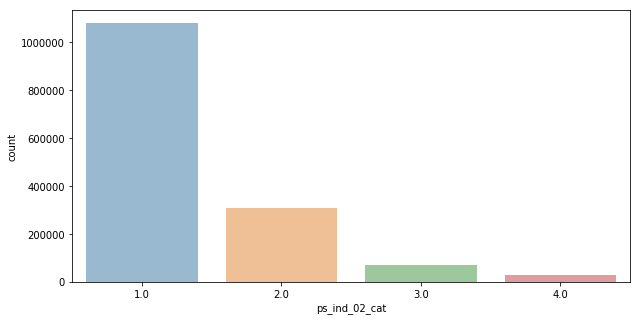

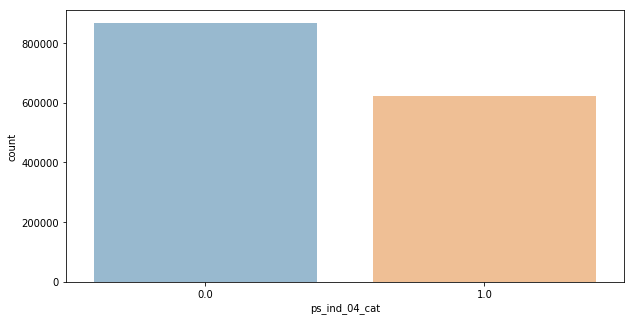

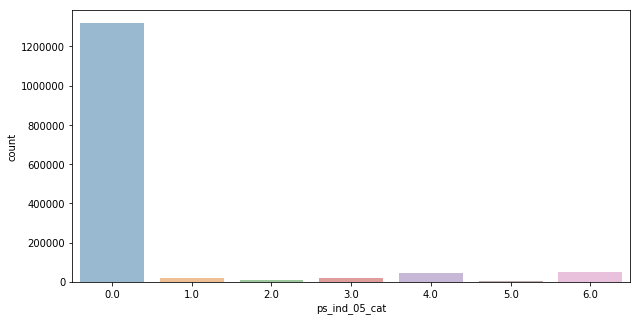

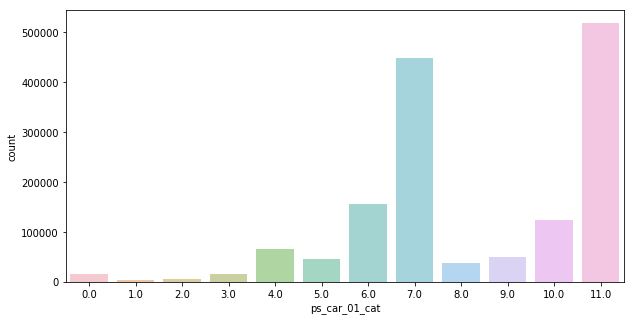

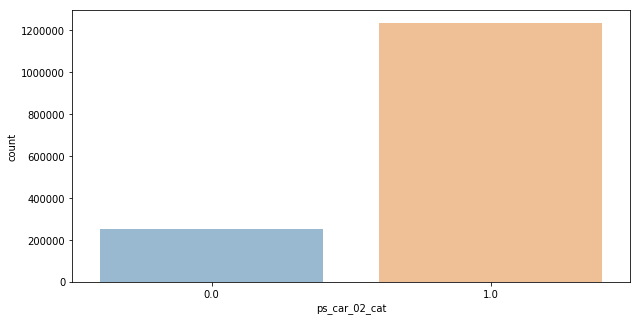

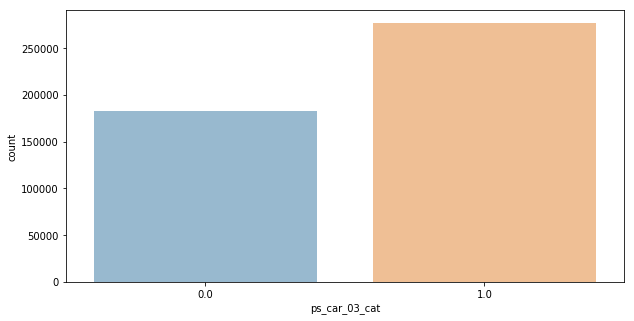

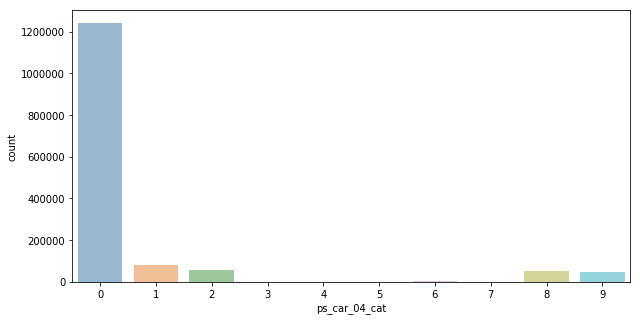

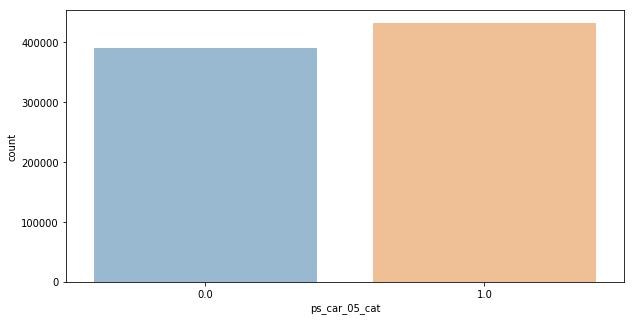

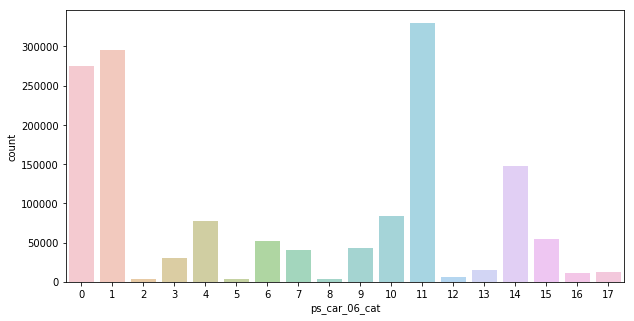

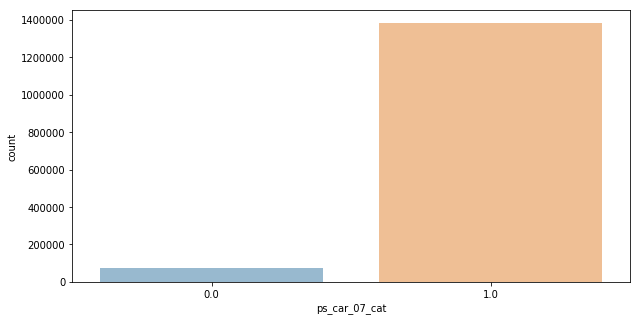

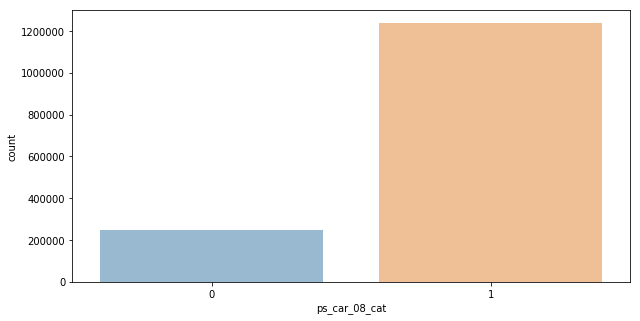

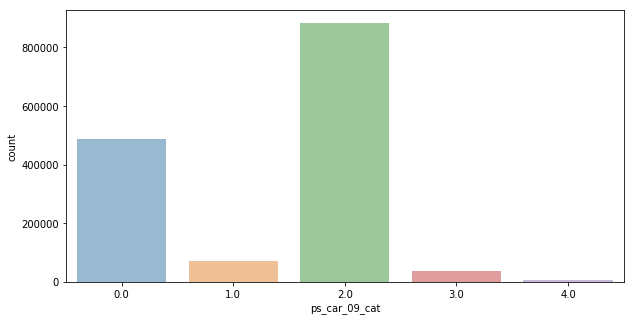

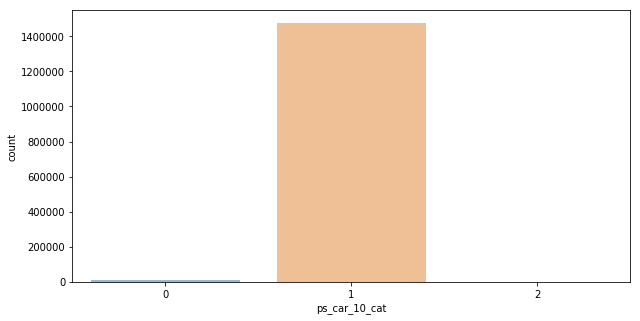

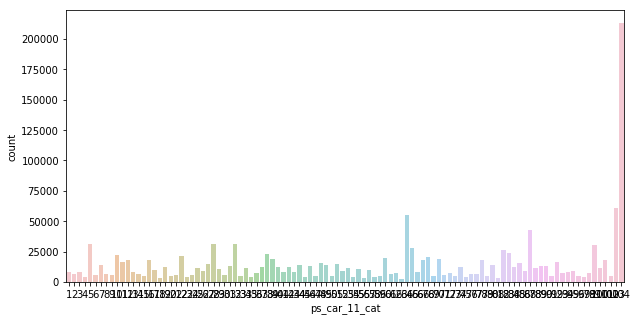

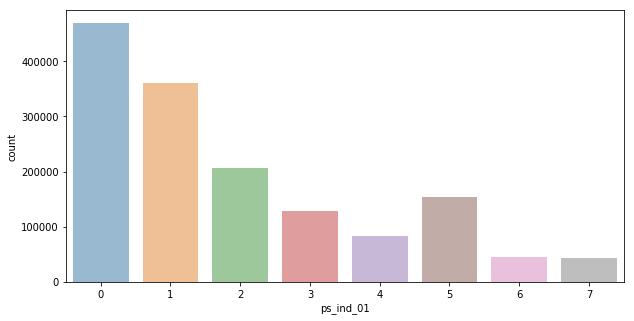

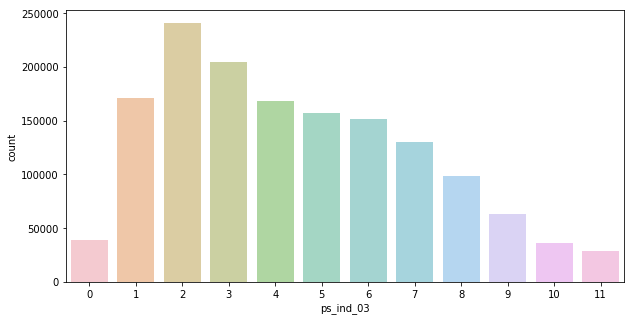

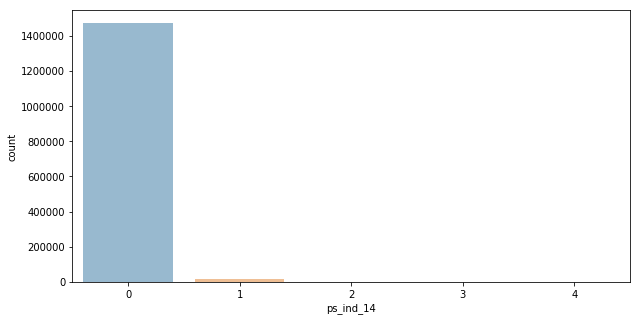

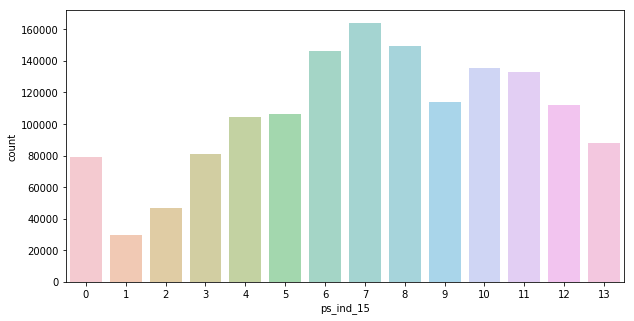

ValueError: Could not interpret input 'ps_calc_04,'

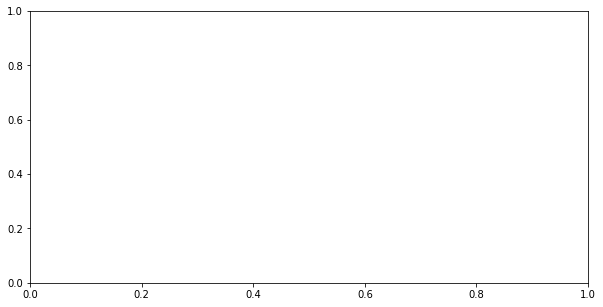

In [141]:
for col in binary + category + integer: 
    bar_plot(col, df)

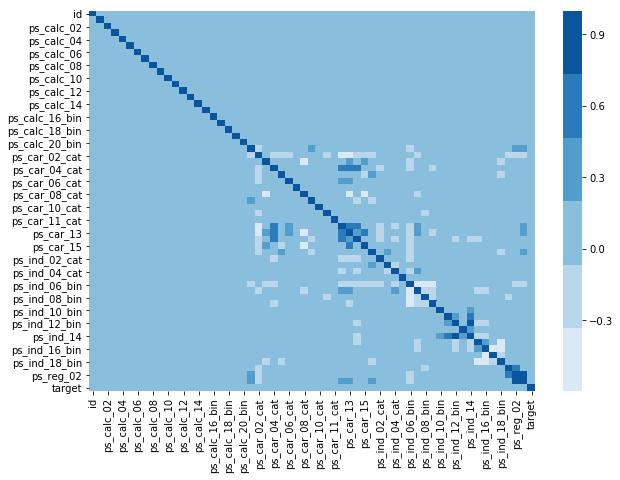

In [142]:
corr=df.corr()
cmap=sns.color_palette("Blues")
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap=cmap)

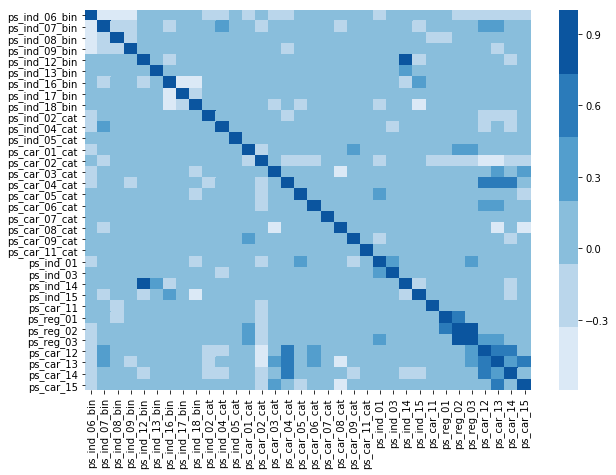

In [143]:
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
           'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 
           'ps_ind_18_bin', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 
           'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 
           'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
           'ps_car_09_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 
           'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_reg_01', 'ps_reg_02', 
           'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
corr_sub = df[features].corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub, cmap=cmap)

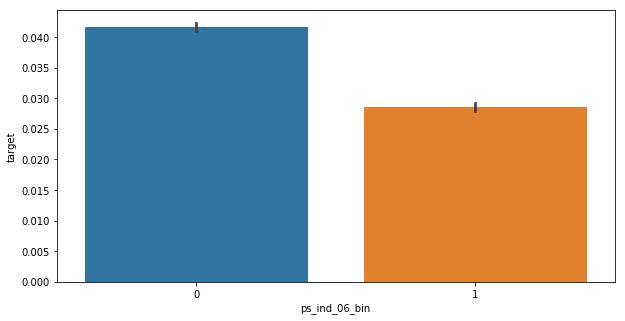

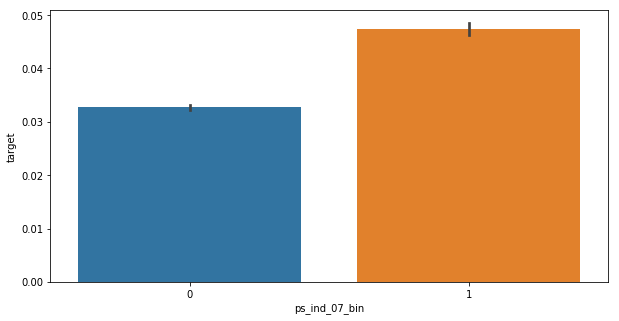

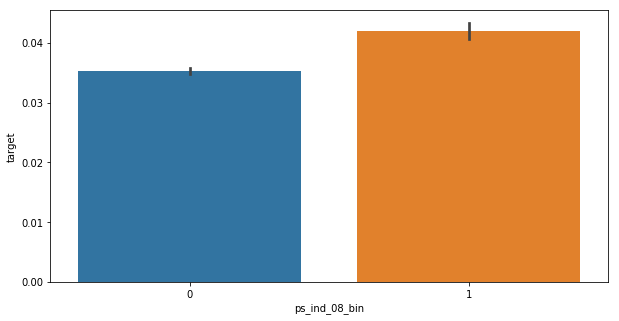

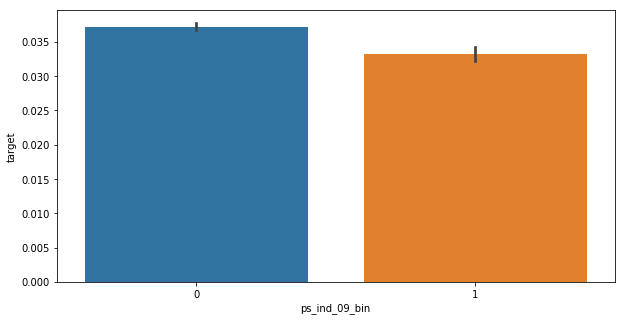

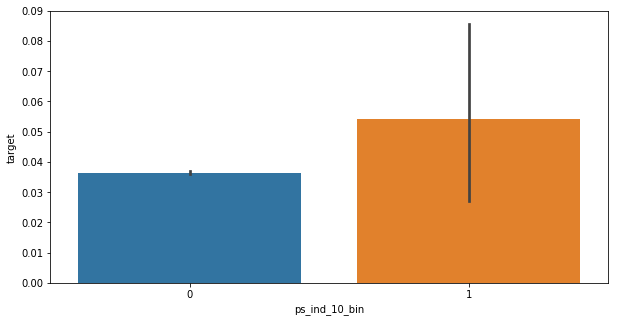

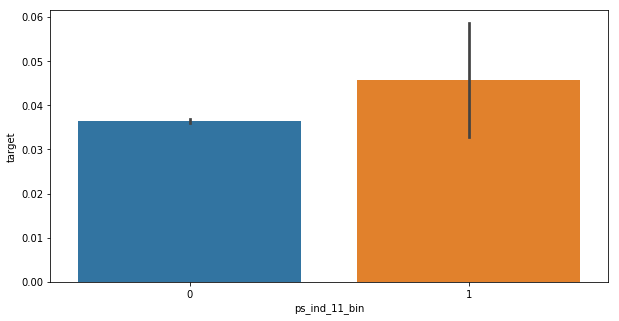

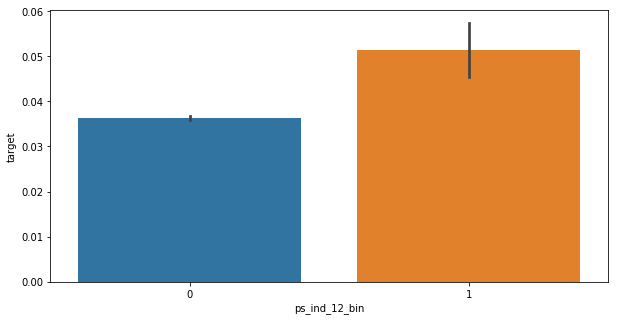

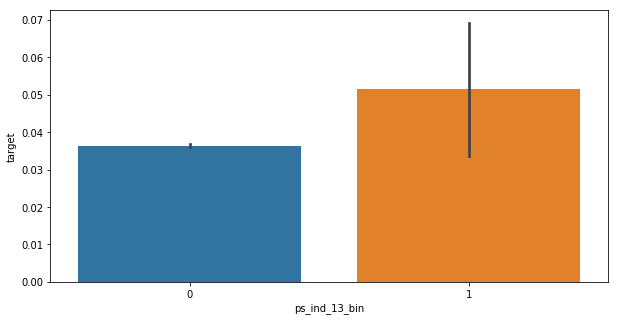

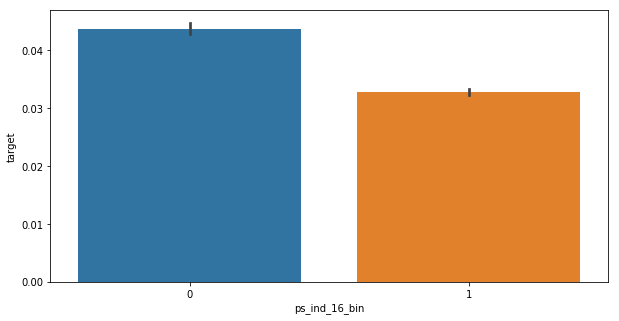

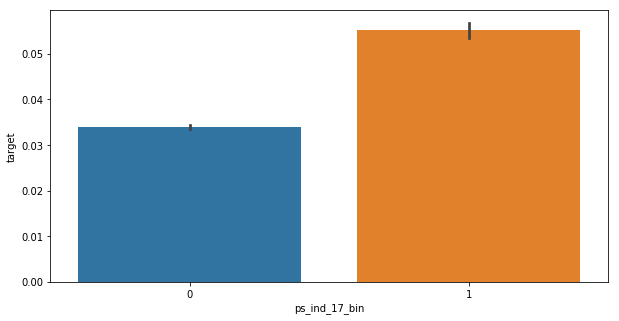

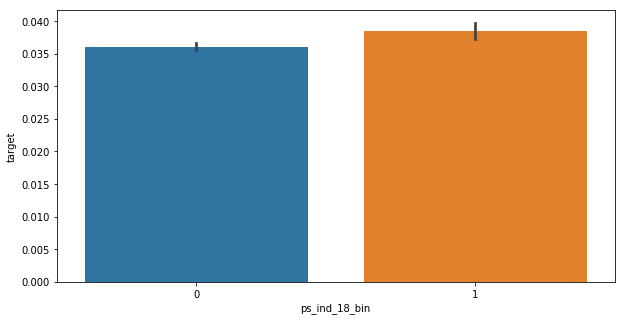

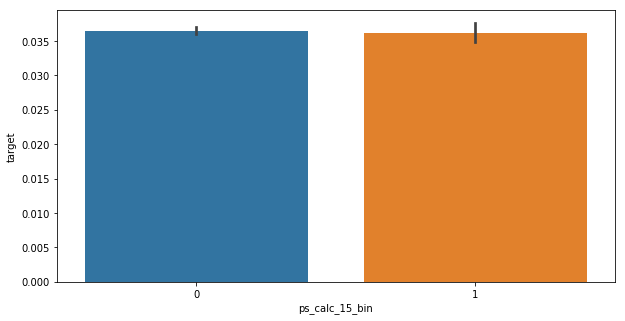

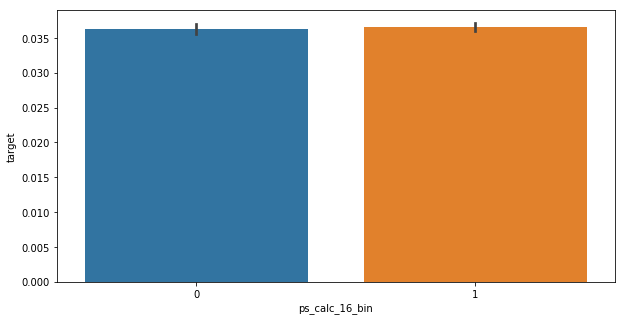

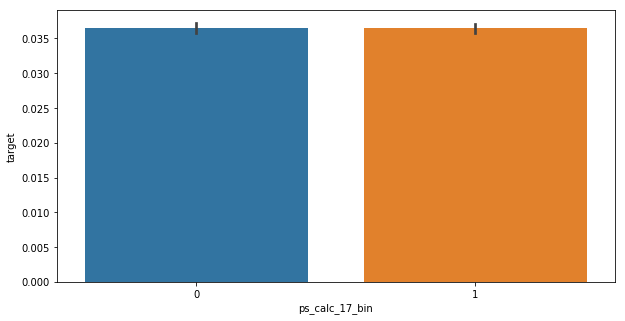

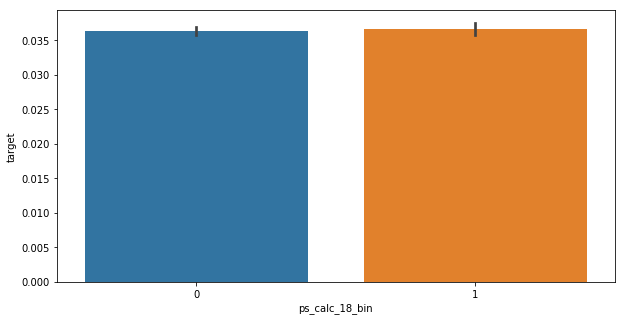

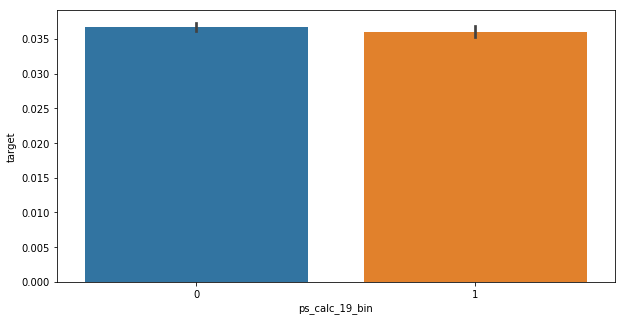

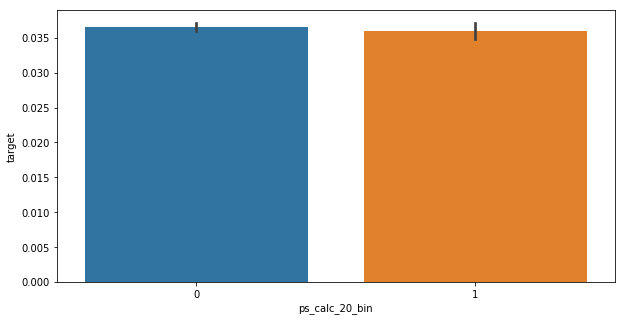

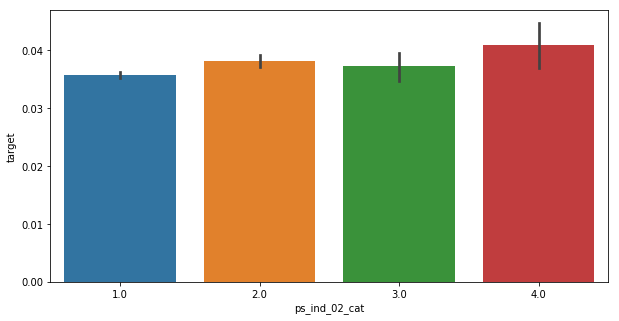

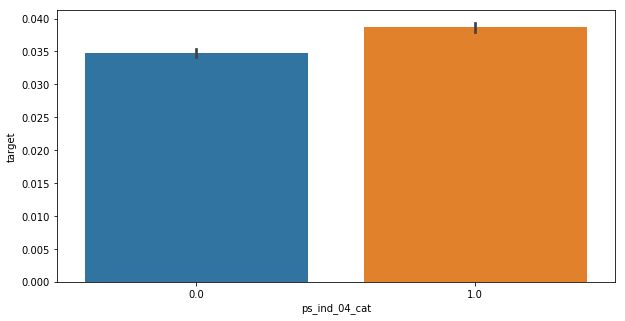

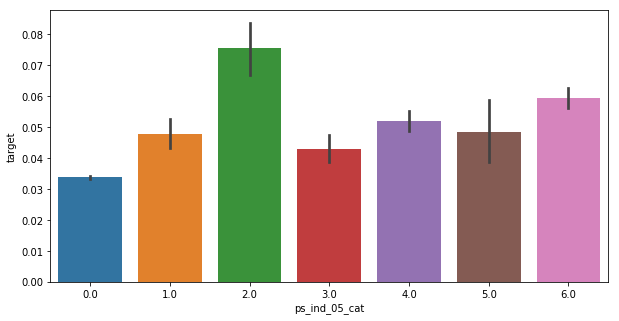

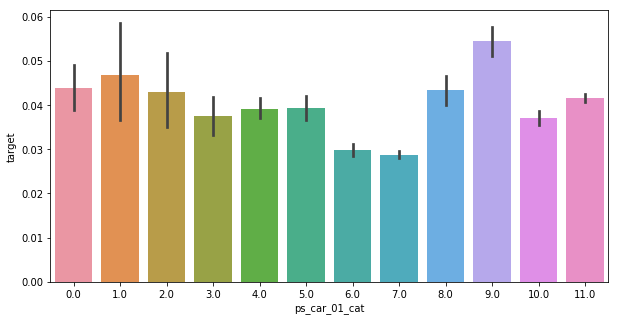

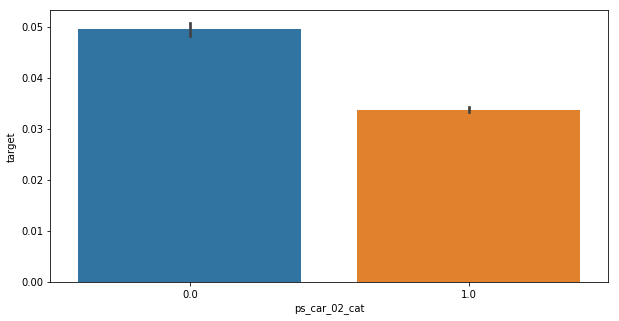

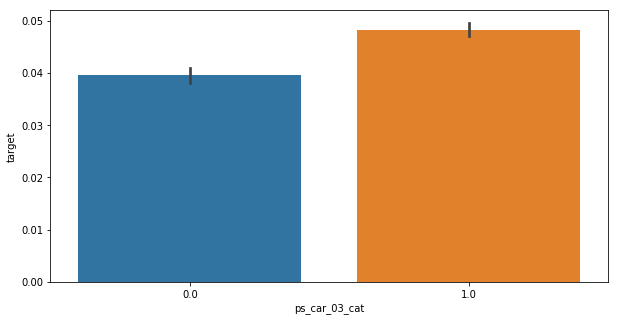

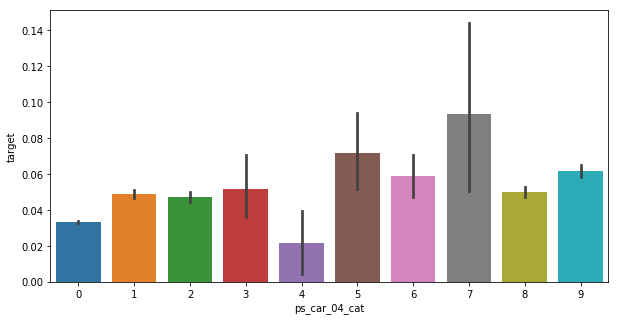

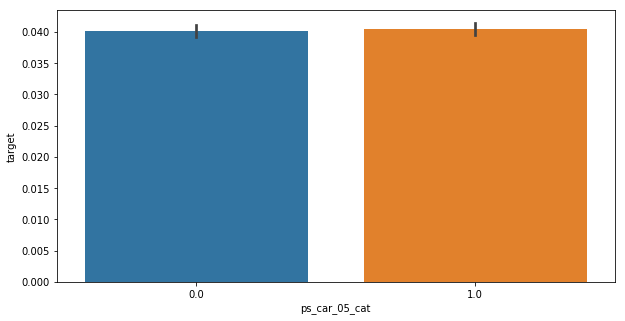

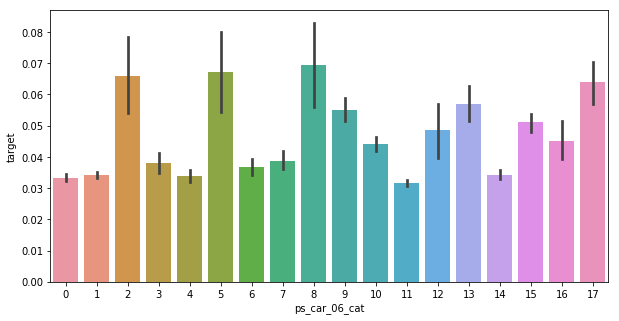

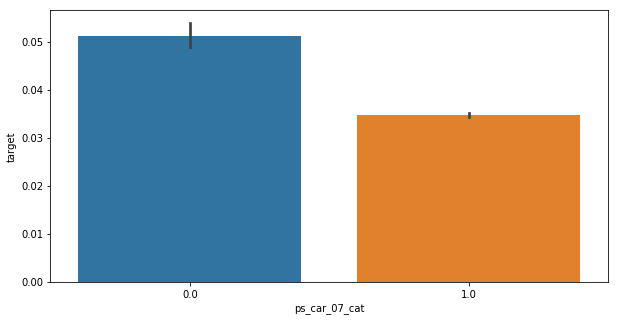

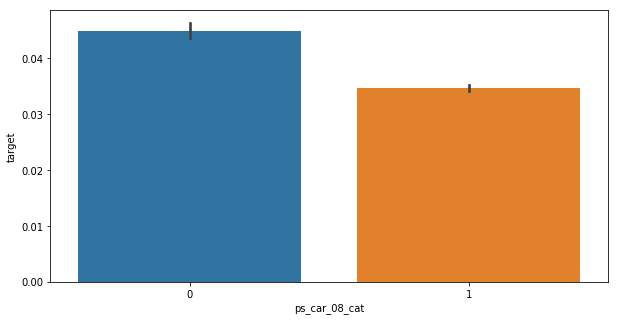

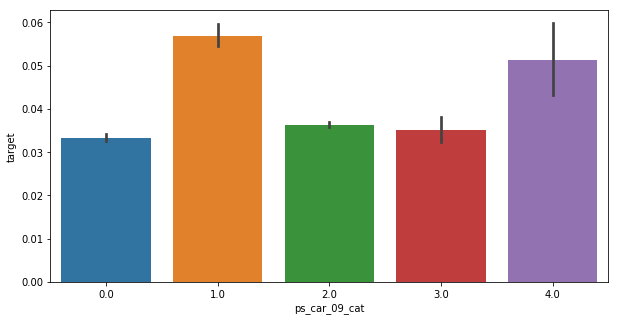

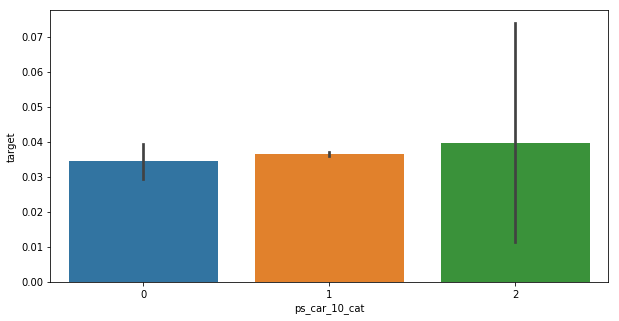

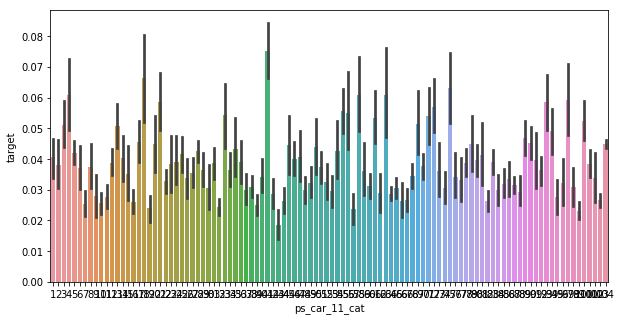

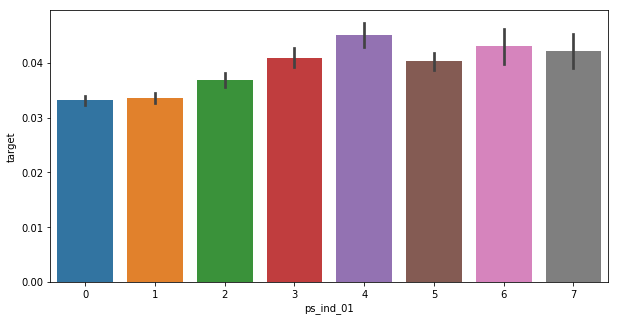

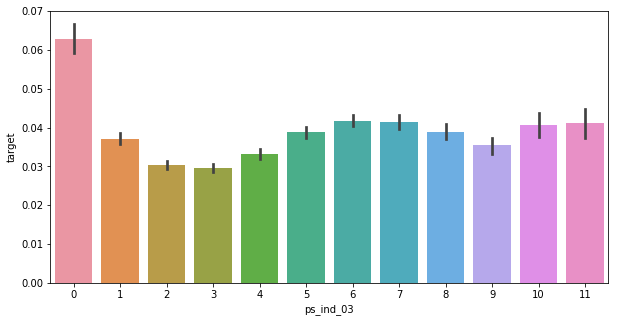

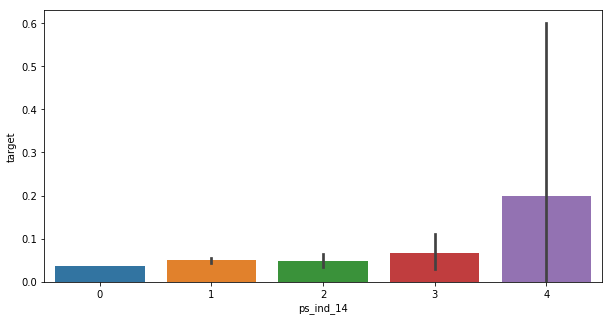

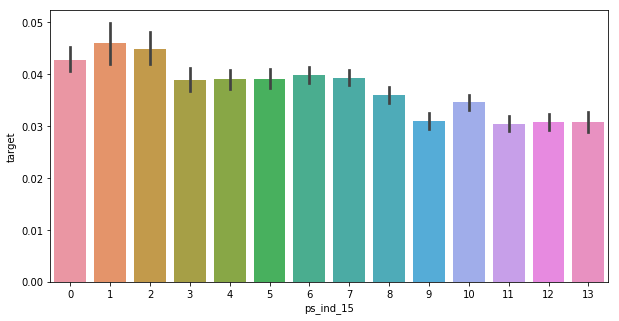

ValueError: Could not interpret input 'ps_calc_04,'

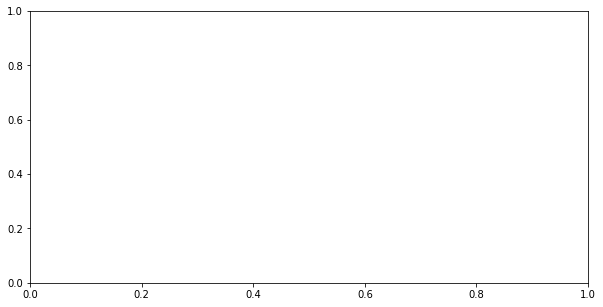

In [144]:
for col in (binary + category + integer):
    bar_plot_ci(col, df)